In [9]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from pathlib import Path
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# ! ln -s /home/edwin/Developer/fastai/fastai fastai

In [13]:
from fastai.imports import *
from fastai.structured import *

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [15]:
data_dir = '/home/edwin/Datasets/competitions/home-credit-default-risk/'

In [16]:
data_folder = Path(data_dir)

In [17]:
trn_csv_raw = pd.read_csv(data_folder/'application_train.csv')

In [34]:
bureau_balance_csv = pd.read_csv(data_folder/'bureau_balance.csv')

In [36]:
bureau_balance_csv.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [37]:
trn_csv_raw.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
trn_csv_raw.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

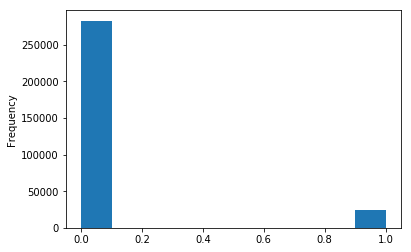

In [41]:
trn_csv_raw.TARGET.astype(int).plot.hist()

In [ ]:
# Predict probability for the target variable

In [44]:
correlations = trn_csv_raw.corr()['TARGET'].sort_values()

In [51]:
correlations.tail(15).index.tolist()

['DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OWN_CAR_AGE',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'TARGET']

In [52]:
TOP_15_CORR = ['DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OWN_CAR_AGE',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'TARGET']

In [18]:
train_cats(trn_csv_raw)

In [19]:
os.makedirs('tmp', exist_ok=True)

In [20]:
trn_csv_raw.to_feather('tmp/home-default-risk-raw')

In [21]:
trn_csv_raw.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
174342,302039,0,Cash loans,M,N,N,1,90000.0,203760.0,16227.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [22]:
trn_csv_raw.TARGET

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
         ..
307481    1
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [23]:
df, y, nas = proc_df(trn_csv_raw, 'TARGET')

In [24]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9853338579758123

In [25]:
preds = m.predict(df)

In [ ]:
y_true = y

In [ ]:
y_scores = preds

In [ ]:
roc_auc_score(y_true, y_scores)

In [26]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [27]:
n_valid = 48744
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(trn_csv_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((258767, 182), (258767,), (48744, 182))

In [28]:
def print_score(m):
    res = [roc_auc_score(m.predict(X_train), y_train),
        roc_auc_score(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    print(res)

In [29]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 28.7 s, sys: 480 ms, total: 29.1 s
Wall time: 6.87 s
[0.99204383676699615, 0.62242011068992864, 0.98534589031831721, 0.91867717052355158]


In [30]:
df_trn, y_trn, nas = proc_df(trn_csv_raw, 'TARGET', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [31]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.04 s, sys: 32 ms, total: 1.08 s
Wall time: 421 ms
[0.99299629689260982, 0.61716779179633885, 0.98694999999999999, 0.9197234531429509]


In [33]:
draw_tree(m.estimators_[0], df_trn, precision=2)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
len(test_csv_raw)

In [ ]:
test_csv_raw = pd.read_csv(data_folder/'application_test.csv')

In [ ]:
test_csv_raw.to_feather('tmp/home-default-risk-raw-test')

In [ ]:
test_csv_raw = pd.read_feather('tmp/home-default-risk-raw-test')

In [ ]:
test_csv_raw['TARGET']= 0
test_csv_raw.TARGET = test_csv_raw.TARGET.astype(int)

In [ ]:
train_cats(test_csv_raw)

In [ ]:
df_test, _, _ = proc_df(test_csv_raw, 'TARGET', na_dict=nas)

In [ ]:
preds = m.predict(df_test)

In [ ]:
list(set(trn_csv_raw.TARGET))

In [ ]:
list(set(preds))

In [ ]:
preds

In [ ]:
trn_csv_raw.sample()

In [ ]:
trn_csv_raw.SK_ID_CURR

In [ ]:
result_csv = pd.DataFrame(columns=['SK_ID_CURR', 'TARGET'])

In [ ]:
result_csv['SK_ID_CURR'] = test_csv_raw.SK_ID_CURR
result_csv['TARGET'] = preds

In [ ]:
result_csv.to_csv('results2.csv', index=False)

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('results2.csv')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.20)

In [ ]:
len(X_train), len(X_valid)

In [ ]:
kf = KFold(n_splits=4)

In [ ]:
kf

In [ ]:
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]

In [ ]:
len(X_train)

In [ ]:
list(kf.split(df))